In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


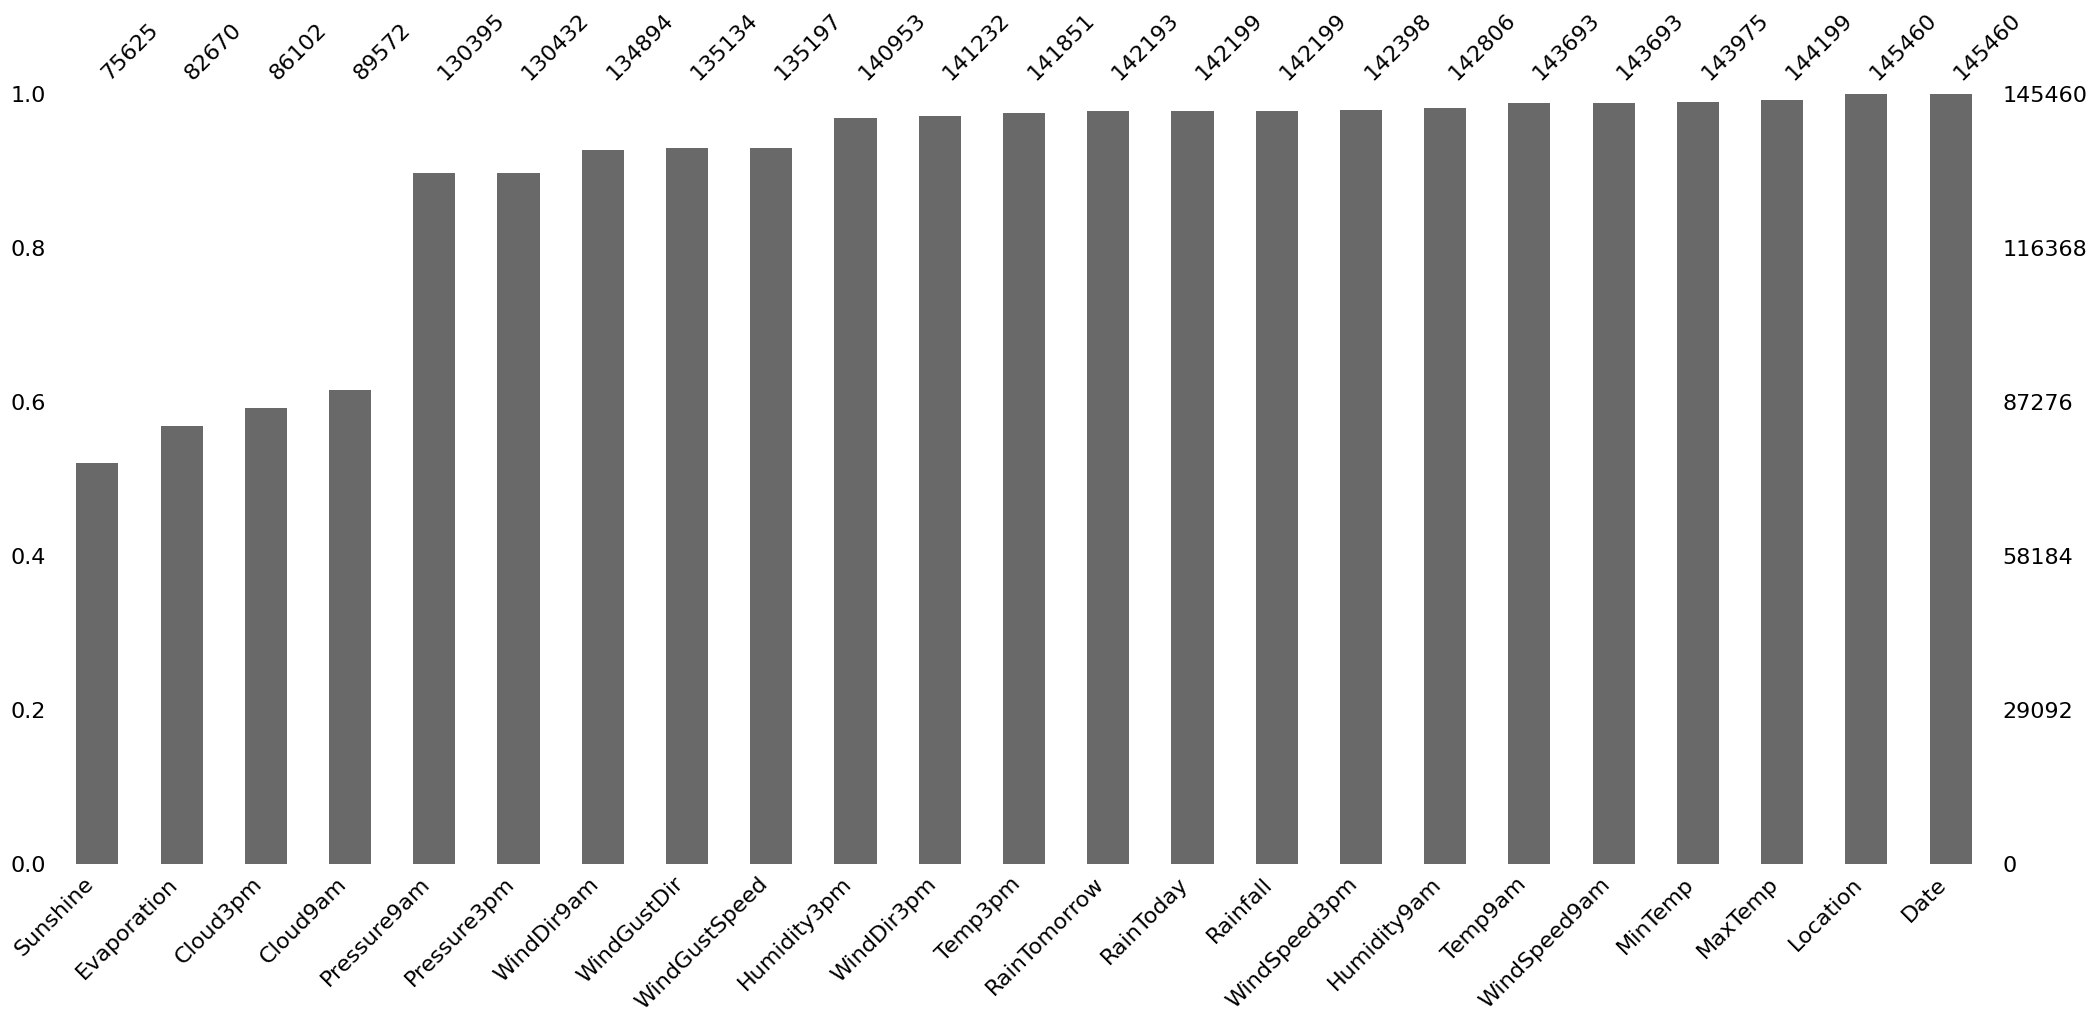

In [4]:
msno.bar(df, sort='ascending')
plt.savefig('missing_values.png', bbox_inches='tight')

In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

data dimensions: (145460, 23)
fraction of missing values in features:
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


[[<Axes: title={'center': 'MinTemp'}> <Axes: title={'center': 'MaxTemp'}>
  <Axes: title={'center': 'Rainfall'}>
  <Axes: title={'center': 'Evaporation'}>]
 [<Axes: title={'center': 'Sunshine'}>
  <Axes: title={'center': 'WindGustSpeed'}>
  <Axes: title={'center': 'WindSpeed9am'}>
  <Axes: title={'center': 'WindSpeed3pm'}>]
 [<Axes: title={'center': 'Humidity9am'}>
  <Axes: title={'center': 'Humidity3pm'}>
  <Axes: title={'center': 'Pressure9am'}>
  <Axes: title={'center': 'Pressure3pm'}>]
 [<Axes: title={'center': 'Cloud9am'}>
  <Axes: title={'center': 'Cloud3pm'}>
  <Axes: title={'center': 'Temp9am'}> <Axes: title={'center': 'Temp3pm'}>]]


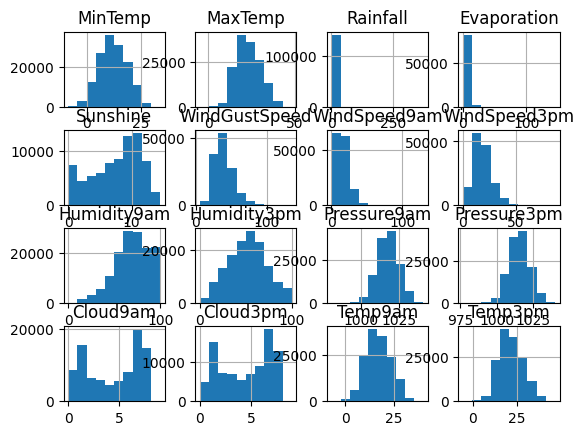

In [9]:
print(df.hist())

In [10]:
# check duplicated rows
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [11]:
# Categorical variable
categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)
for name in categorical:
    print("=========="+name+"=============")
    print(df[name].value_counts())

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
==========Date=============
Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
==========Location=============
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nurioo

In [12]:
perc_missing_per_ftr = df[categorical].isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64


There are five variables with missing values: WindGustDir, WindDir9am, WindDir3am, RainToday and RainTomorrow. We will fix this problem in feature egineering section.

In [13]:
## taget variable RainTomorrow
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [14]:
df['RainTomorrow'].isnull().sum()

3267

Without the target variable, observations cannot provide any useful information for a supervised machine learning model. Therefore, we will drop all rows with missing target variables.

In [15]:
# drop the row with missing target variable
df = df[pd.notna(df['RainTomorrow'])]

In [16]:
df['RainTomorrow'].isnull().sum()

0

In [17]:
perc_missing_per_ftr = df[categorical].isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
WindGustDir    0.065615
WindDir9am     0.070418
WindDir3pm     0.026570
RainToday      0.009888
dtype: float64


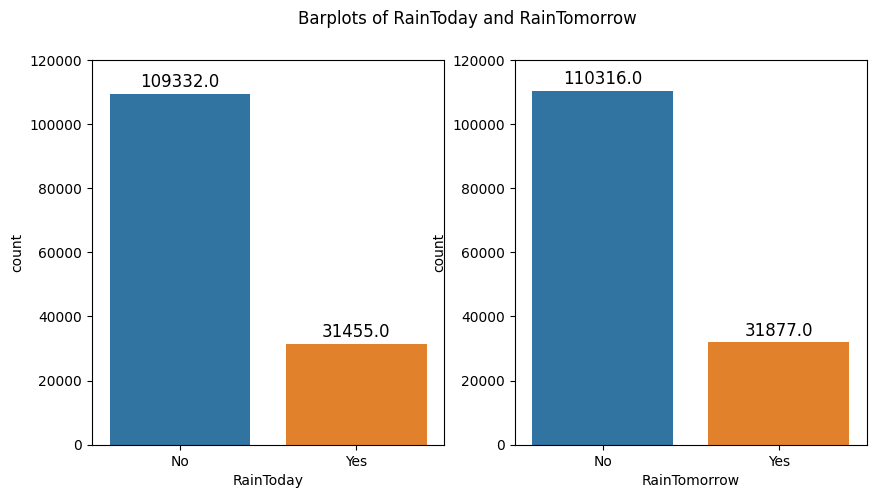

In [18]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=df,x='RainToday',ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')
ax[0].set_ylim(0, 120000)
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')
ax[1].set_ylim(0, 120000)
fig.suptitle("Barplots of RainToday and RainTomorrow")
plt.savefig('bar_plot.png', bbox_inches='tight')

In [19]:
## Date
df['Date'].nunique()

3436

There are 3436 unique value in Date column, so we consider to convert this column to year, month and day.

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# add year column
df['Year'] = df['Date'].dt.year

In [22]:
# add month column
df['Month'] = df['Date'].dt.month

In [23]:
# add day column
df['Day'] = df['Date'].dt.day

In [24]:
# drop the original Date column since we already have the date information in new columns
df.drop('Date', axis=1, inplace = True)

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [26]:
##. Location
print(df['Location'].value_counts())

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [27]:
df['Location'].isnull().sum(axis=0)

0

There are no missing value in Location column.

In [28]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [29]:
## WindGustDir
df['WindGustDir'].value_counts()

WindGustDir
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64

In [30]:
df['WindGustDir'].isnull().sum()

9330

There are 9330 missing values in the WindGustDir column. We will use a Simple Imputer to handle the missing values by replacing them with the category 'other'. Also, the WindGustDir is a categorical variablek and we will use onehot encoder to preprocess the column.

In [31]:
## WindDir9am
df['WindDir9am'].value_counts()

WindDir9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64

In [32]:
df['WindDir9am'].isnull().sum()

10013




There are 10013 missing values in the WindDir9am column. We will use a Simple Imputer to handle the missing values by replacing them with the category 'other'. Also, the WindDir9am is a categorical variablek and we will use onehot encoder to preprocess the column.

In [33]:
## WindDir3pm
df['WindDir3pm'].value_counts()

WindDir3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64

In [34]:
df['WindDir3pm'].isnull().sum()

3778

There are 3778 missing values in the WindDir3am column. We will use a Simple Imputer to handle the missing values by replacing them with the category 'other'. Also, the WindDir3am is a categorical variablek and we will use onehot encoder to preprocess the column.


In [35]:
## RainToday
df['RainToday'].value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [36]:
df['RainToday'].isnull().sum()

1406

There are 1406 missing values in the RainToday column. We will use a Simple Imputer to handle the missing values by replacing them with the category 'other'. Also, the RainToday is a categorical variablek and we will use onehot encoder to preprocess the column.


In [37]:
df['Cloud3pm'].dtype

dtype('float64')

In [38]:
df.shape

(142193, 25)

In [39]:
# Continous variable
continuous = [var for var in df.columns if df[var].dtype== 'float64']
print(continuous)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [40]:
perc_missing_per_ftr = df[continuous].isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustSpeed    0.065193
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64


In [41]:
# view summary statistics of the continuous variables
print(round(df[continuous].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

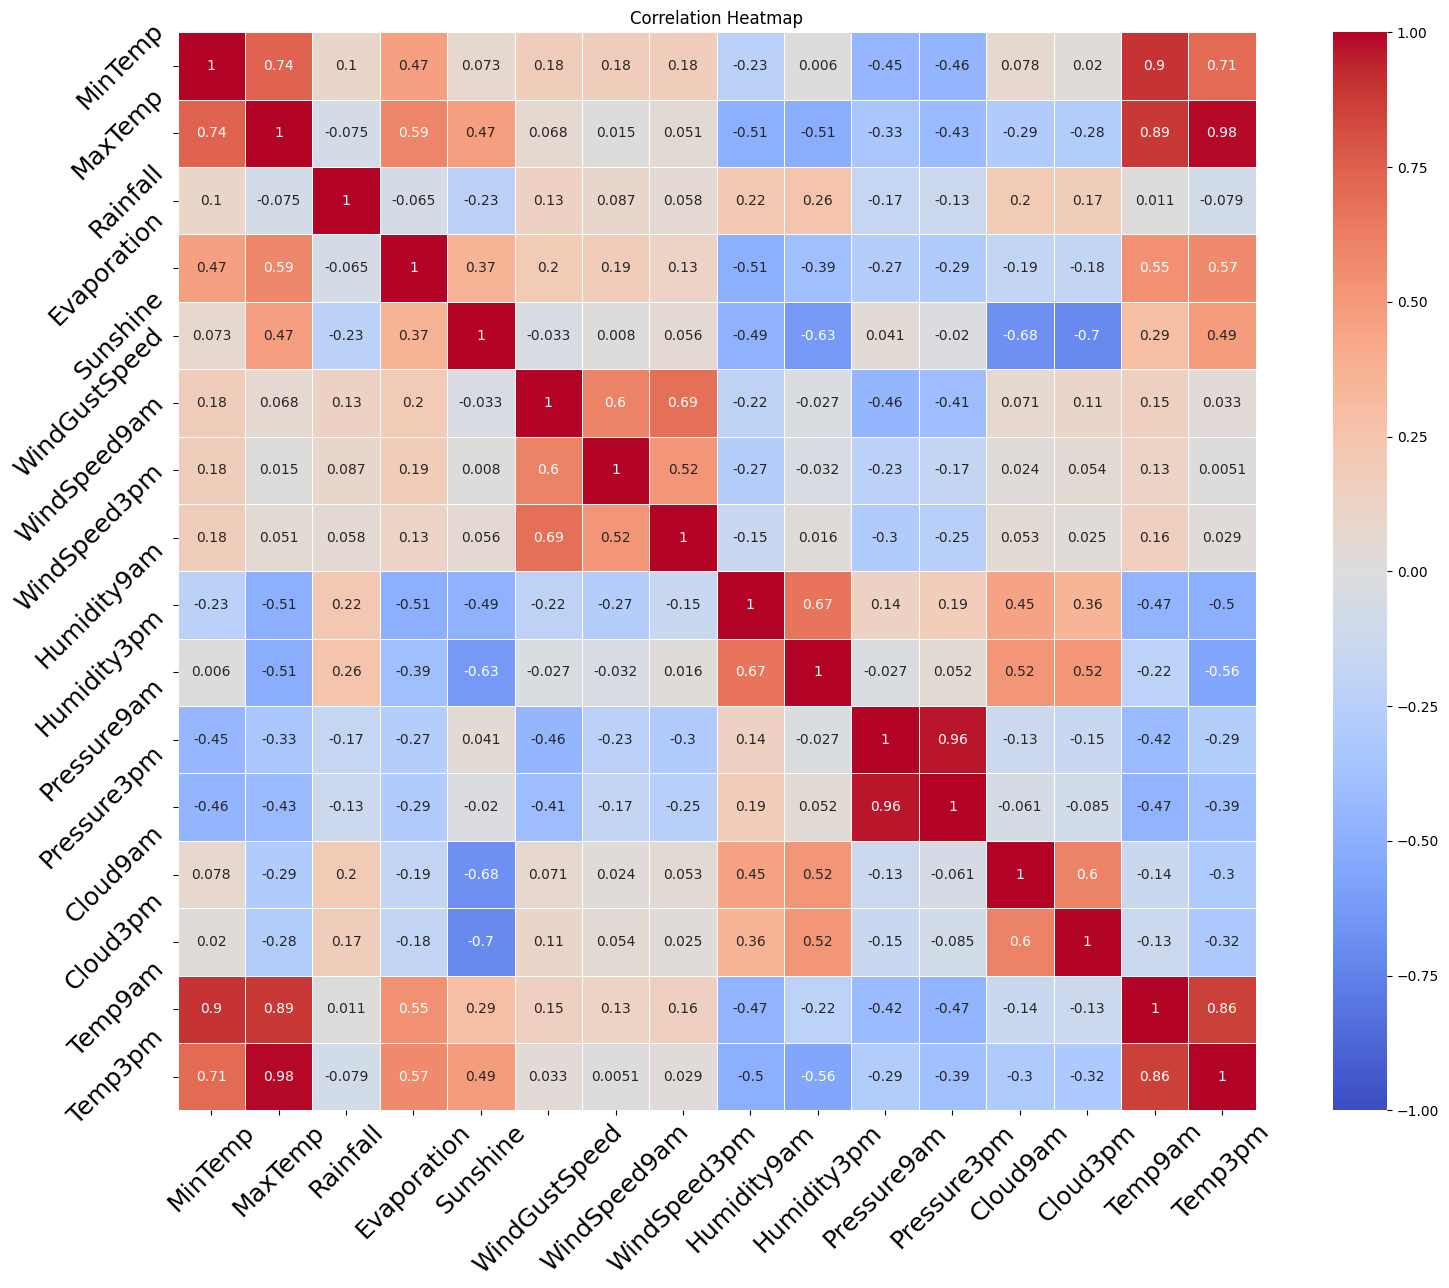

In [42]:
import seaborn as sns
corr_matrix = df[continuous].corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(20, 14)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(fontsize=18, rotation=45)  # 使x轴刻度旋转45度
plt.yticks(fontsize=18, rotation=45)
plt.savefig('correlation.png', bbox_inches='tight')
plt.show()

For the above correlation plot, we can conclude that:
1. Variable MinTemp and Temp9am are highly postive correlated. (with a positive correlation value = 0.9).
2. Variable MinTemp and MaxTemp are highly postive correlated. (with a positive correlation value = 0.74).
3. Variable MinTemp and Temp3pm are highly postive correlated. (with a positive correlation value = 0.71).
4. Variable MaxTemp and Temp9am are highly postive correlated. (with a positive correlation value = 0.89).
5. Variable MaxTemp and Temp3pm are highly postive correlated. (with a positive correlation value = 0.98).
6. Variable Pressure9am and Pressure3pm are highly postive correlated. (with a positive correlation value = 0.96).
7. Variable Temp9am and Temp3pm are highly postive correlated. (with a positive correlation value = 0.89).

Due to the high correlation value, we decide to drop variable Temp9am, Temp3pm and Pressure3pm

In [43]:
num_var = ['MinTemp','MaxTemp','Temp9am','Temp3pm','Pressure9am', 'Pressure3pm']

In [44]:
# g = sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow', diag_kws={'bins': 30})
# for ax in g.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), fontsize=20, rotation=45)  
#     ax.set_ylabel(ax.get_ylabel(), fontsize=15)  
# plt.savefig('Pair_plot.png', bbox_inches='tight')
# plt.show()

In [45]:
df.drop('Temp9am', axis=1, inplace = True)
df.drop('Temp3pm', axis=1, inplace = True)
df.drop('Pressure3pm', axis=1, inplace = True)

In [46]:
# Continous variable
continuous = [var for var in df.columns if df[var].dtype== 'float64']
print(continuous)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm']


In [47]:
num_ftr = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am','RainTomorrow']

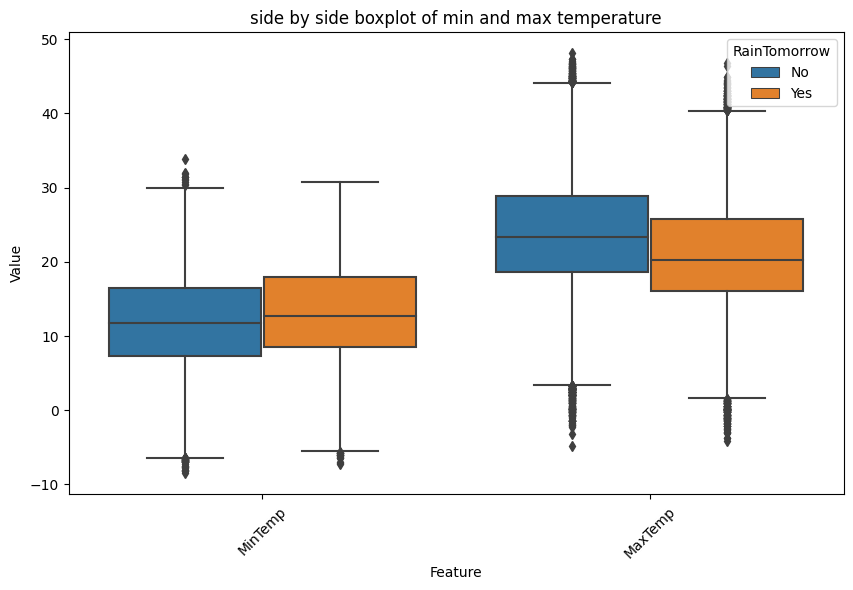

In [48]:
num_ftr = ['MinTemp', 'MaxTemp','RainTomorrow' ]
df_box=pd.melt(df[num_ftr], id_vars=['RainTomorrow'], value_vars=['MinTemp', 'MaxTemp'],
                  var_name='Feature', value_name='Value')
plt.figure(figsize=(10,6))
sns.boxplot(df_box,x='Feature', y='Value', hue='RainTomorrow' )
#df[num_ftr].boxplot(hue='RainTomorrow')
plt.xticks(fontsize=10, rotation=45)  # 使x轴刻度旋转45度
plt.yticks(fontsize=10)
plt.title("side by side boxplot of min and max temperature")
# plt.xlabel('X Label', fontsize=40)
# plt.ylabel('Y Label', fontsize=40)
plt.savefig('boxplot.png', bbox_inches='tight')

plt.show()

In [49]:
# df_box=pd.melt(df[num_ftr], id_vars=['RainTomorrow'], value_vars=['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am'],
#                   var_name='Feature', value_name='Value')

In [50]:
# df_box

In [51]:
# df

In [52]:
# df['Rainfall']

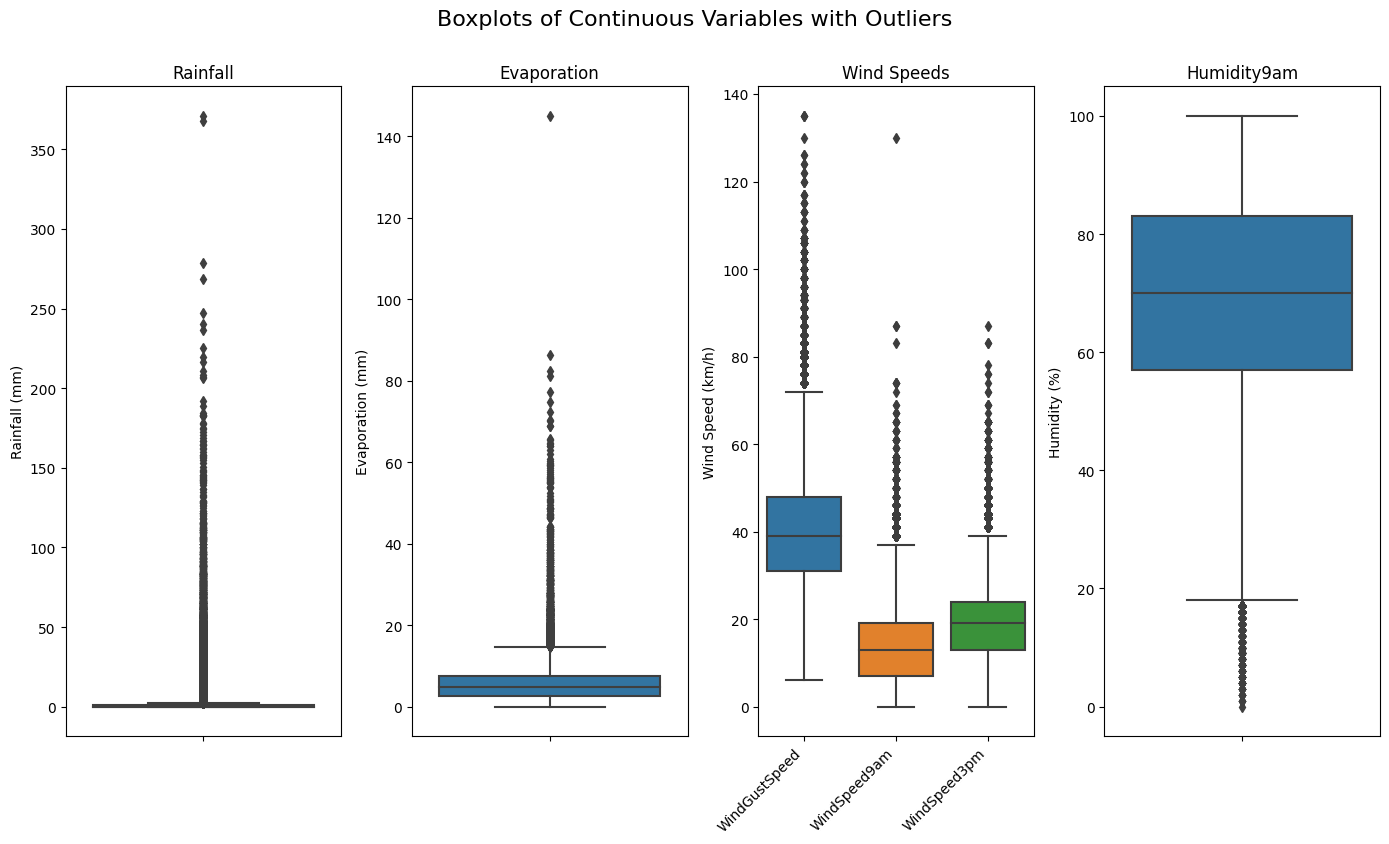

In [53]:
%matplotlib inline
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 8))

# Rainfall boxplot
sns.boxplot(y=df['Rainfall'], ax=axs[0])
axs[0].set_title('Rainfall')
axs[0].set_ylabel('Rainfall (mm)')

# Evaporation boxplot
sns.boxplot(y=df['Evaporation'], ax=axs[1])
axs[1].set_title('Evaporation')
axs[1].set_ylabel('Evaporation (mm)')

# WindSpeed boxplots
sns.boxplot(data=df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']], ax=axs[2], orient='v')
axs[2].set_title('Wind Speeds')
axs[2].set_ylabel('Wind Speed (km/h)')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Humidity boxplot
sns.boxplot(y=df['Humidity9am'], ax=axs[3])
axs[3].set_title('Humidity9am')
axs[3].set_ylabel('Humidity (%)')

# Adjust layout for clarity
plt.tight_layout()
fig.suptitle("Boxplots of Continuous Variables with Outliers", fontsize=16, y=1.05)  # y调整标题位置
# Adjust layout, leaving space for the suptitle
fig.savefig('boxplot.png')
plt.show()

In [54]:
# plt.figure(figsize=(50,35))
# sns.boxplot(df_box,x='Feature', y='Value', hue='RainTomorrow' )
# #df[num_ftr].boxplot(hue='RainTomorrow')
# plt.xticks(fontsize=40, rotation=45)  # 使x轴刻度旋转45度
# plt.yticks(fontsize=40)
# # plt.xlabel('X Label', fontsize=40)
# # plt.ylabel('Y Label', fontsize=40)
# plt.savefig('boxplot.png', bbox_inches='tight')

# plt.show()

Upon closer inspection, we found that Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am and Pressure9am contain significant outliers.

In [55]:
# # use log transformation
# df['log_Rainfall'] = np.log1p(df['Rainfall'])
# df['log_Evaporation'] = np.log1p(df['Evaporation'])
# df['log_WindGustSpeed'] = np.log1p(df['WindGustSpeed'])
# df['log_WindSpeed9am'] = np.log1p(df['WindSpeed9am'])
# df['log_WindSpeed3pm'] = np.log1p(df['WindSpeed3pm'])
# df['log_Humidity9am'] = np.log1p(df['Humidity9am'])
# df['log_Pressure9am'] = np.log1p(df['Pressure9am'])
# #df['log_Pressure3pm'] = np.log1p(df['Pressure3pm'])

In [56]:
# plt.figure(figsize=(50,35))
# df[['log_Rainfall', 'log_Evaporation', 'log_WindGustSpeed', 'log_WindSpeed9am', 'log_WindSpeed3pm', 'log_Humidity9am', 'log_Pressure9am']].boxplot()

In [57]:
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
import warnings
warnings.filterwarnings('ignore')
def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits)+0.5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

<Figure size 1000x600 with 0 Axes>

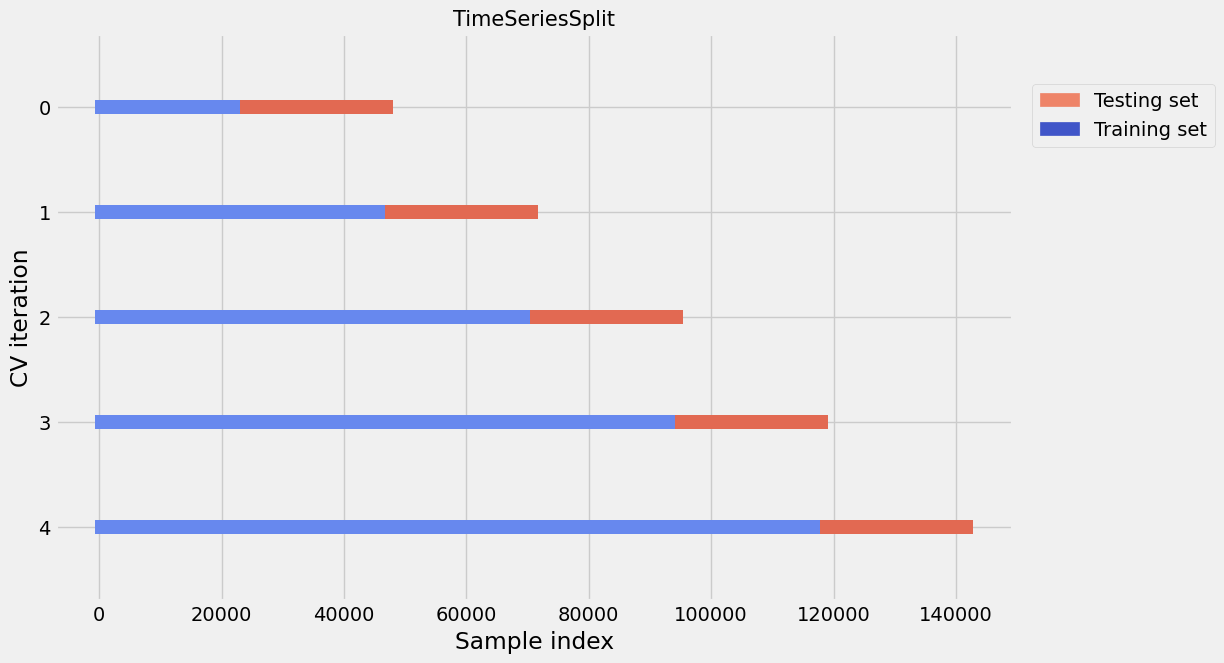

In [58]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']
from sklearn.model_selection import TimeSeriesSplit
# Plotting
plt.figure(figsize=(10, 6))
n_splits = 5
this_cv = TimeSeriesSplit(n_splits=5)
plot_cv_indices(this_cv, n_splits, X,y, date_col=None)
plt.savefig('timeseries_split.png', bbox_inches='tight')

In [59]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 142193, dtype: object

In [60]:
for x_f,y_f in this_cv.split(X,y):
    y_temp = y.iloc[x_f]
    print(len(y_temp[y_temp=='Yes'])/len(y_temp[y_temp=='No']))

0.29059131002940214
0.2881756664945512
0.28254203044952736
0.29896271530166213
0.2955512064988028


In [61]:
# basic split function from hw3.
from sklearn.model_selection import train_test_split 
def basic_split(X, y, train_size, val_size, test_size, random_state = 42):
    # test the input
    if abs(train_size+val_size+test_size-1) >= 1e-4:
        raise ValueError("The sum of the training, validation and test sizes should be 1!")
    if type(random_state) != int:
        raise ValueError("Random state should be an integer!")

    X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = train_size,random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other,\
                                                   train_size = val_size/(val_size+test_size), random_state = random_state)

    # test the output
    if abs(len(X_train)/len(X) - train_size) >= 1e-2:
        raise ValueError("The size of X_train is wrong!")
    if abs(len(X_val)/len(X) - val_size) >= 1e-2:
        raise ValueError("The size of X_val is wrong!")
    if abs(len(X_test)/len(X) - test_size) >= 1e-2:
        raise ValueError("The size of X_test is wrong!")
    

    return X_train, y_train, X_val, y_val, X_test, y_test
    

In [62]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [63]:
random_state = 42
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.8,0.1,0.1,random_state)

In [64]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

num_ftrs = [var for var in X.columns if X[var].dtype== 'float64']
cat_ftrs = [var for var in X.columns if X[var].dtype== 'O']
print(num_ftrs, cat_ftrs)
# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='other')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
     ('imputer', IterativeImputer(estimator=XGBRegressor(), max_iter=10, random_state=42)),
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

clf = Pipeline(steps=[('preprocessor',preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm'] ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [65]:
np.isnan(X_test_prep).sum()

0

In [66]:
X_train_prep.shape

(113754, 116)

In [67]:
X_test_prep.shape

(14220, 116)